<a href="https://colab.research.google.com/github/istizhraa24/Capstone-Project-Data-Classification-and-Summarization-Using-IBM-Granite/blob/main/Capstone_Project_Brief.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install pustaka yang dibutuhkan
!pip install openpyxl matplotlib seaborn pandas --quiet

# Import pustaka
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca file Excel
file_path = "/content/jumlah-kejadian-bencana-menurut-provinsi-tahun-2010-2024.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# Tampilkan 5 baris pertama
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,Jenis Bencana,:,Pengkategorian jenis bencana berdasarkan kejad...
2,Kode Wilayah Provinsi,:,Kode Wilayah Administrasi Provinsi Menurut Per...
3,Kode Wilayah Kabupaten/Kota,:,Kode Wilayah Administrasi Kabupaten/Kota Menur...
4,Provinsi,:,Nama Kabupaten yang Mengalami Bencana


In [ ]:
# Lihat info data
df.info()

# Cek apakah ada nilai kosong
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8 non-null      object
 1   Unnamed: 1  8 non-null      object
 2   Unnamed: 2  15 non-null     object
dtypes: object(3)
memory usage: 516.0+ bytes


,0
Unnamed: 0,8
Unnamed: 1,8
Unnamed: 2,1


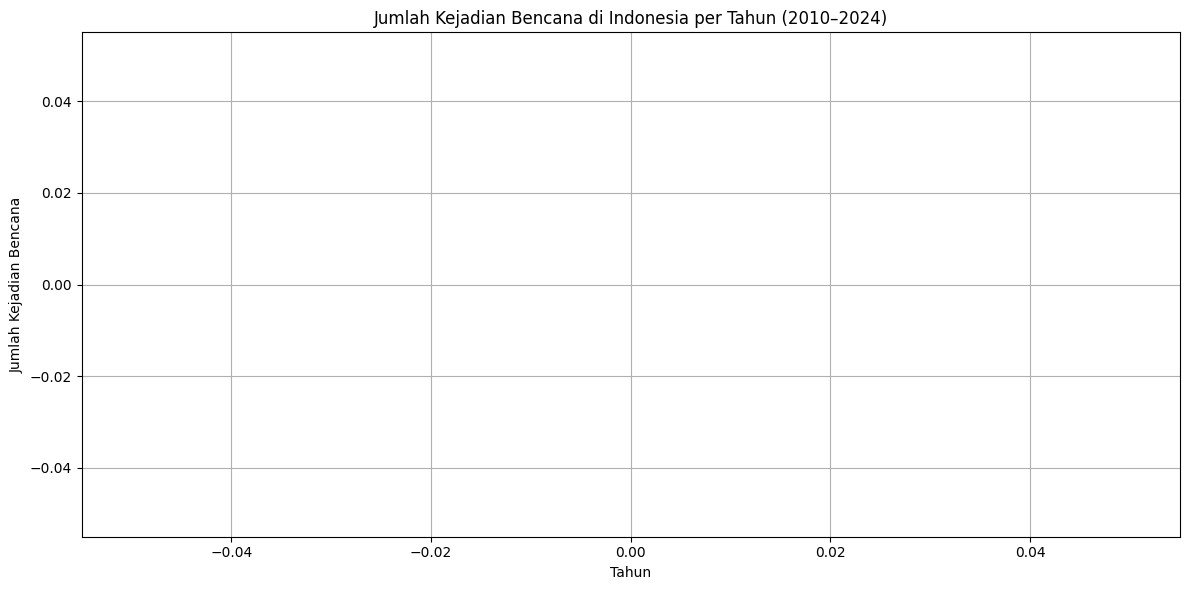

In [ ]:
# STEP 1: Baca data (dengan header mulai dari baris ke-6)
df = pd.read_excel(file_path, engine='openpyxl', skiprows=5)

# STEP 2: Rename kolom pertama jika belum benar
df.rename(columns={df.columns[0]: 'Provinsi'}, inplace=True)

# STEP 3: Tentukan kolom tahun yang valid (2010–2024)
tahun_cols = [str(tahun) for tahun in range(2010, 2025)]
available_cols = [col for col in df.columns if col in tahun_cols]

# STEP 4: Lakukan melt hanya pada kolom tahun
df_melted = df.melt(id_vars='Provinsi', value_vars=available_cols,
                    var_name='Tahun', value_name='Jumlah_Bencana')

# STEP 5: Bersihkan data
df_melted.dropna(subset=['Jumlah_Bencana'], inplace=True)
df_melted['Tahun'] = df_melted['Tahun'].astype(int)

# STEP 6: Agregasi jumlah bencana nasional per tahun
total_per_tahun = df_melted.groupby('Tahun')['Jumlah_Bencana'].sum().reset_index()

# STEP 7: Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=total_per_tahun, x='Tahun', y='Jumlah_Bencana', marker='o')
plt.title("Jumlah Kejadian Bencana di Indonesia per Tahun (2010–2024)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kejadian Bencana")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Lihat info data
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Provinsi                               4 non-null      object
 1   :                                      4 non-null      object
 2   Nama Kabupaten yang Mengalami Bencana  11 non-null     object
dtypes: object(3)
memory usage: 396.0+ bytes


,0
Provinsi,7
:,7
Nama Kabupaten yang Mengalami Bencana,0


/tmp/ipython-input-37-2594578231.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


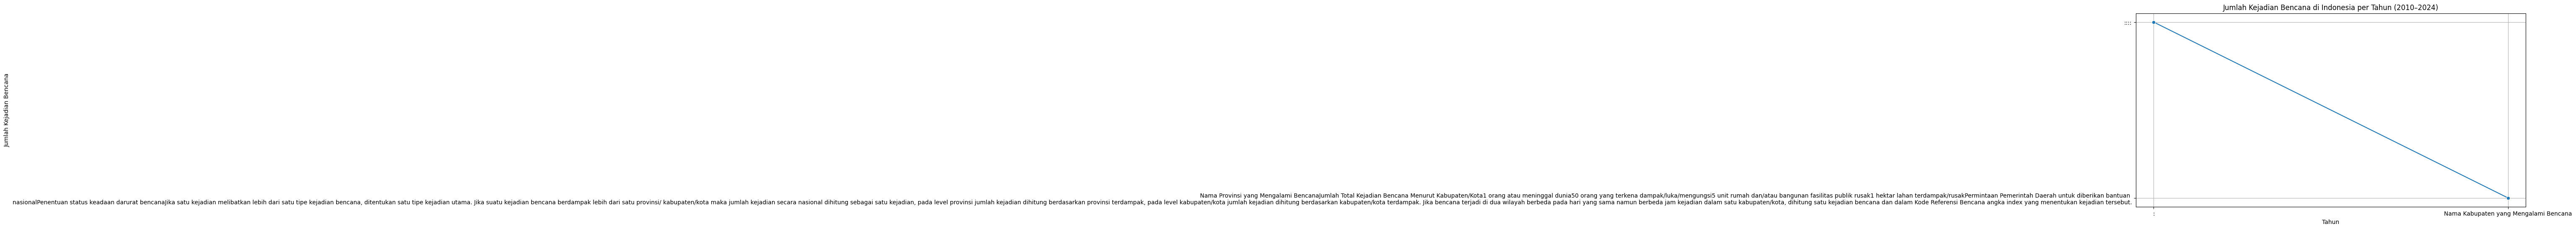

In [ ]:
# Asumsi: kolom pertama adalah 'Provinsi', sisanya adalah tahun 2010-2024
# Ubah struktur data dari wide → long (untuk visualisasi lebih mudah)
df_melted = df.melt(id_vars='Provinsi', var_name='Tahun', value_name='Jumlah_Bencana')

# Agregasi total bencana nasional per tahun
total_per_tahun = df_melted.groupby('Tahun')['Jumlah_Bencana'].sum().reset_index()

# Visualisasi tren jumlah bencana nasional
plt.figure(figsize=(12,6))
sns.lineplot(data=total_per_tahun, x='Tahun', y='Jumlah_Bencana', marker='o')
plt.title("Jumlah Kejadian Bencana di Indonesia per Tahun (2010–2024)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kejadian Bencana")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-38-699212148.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_per_provinsi[:10], y=total_per_provinsi.index[:10], palette='Reds_r')


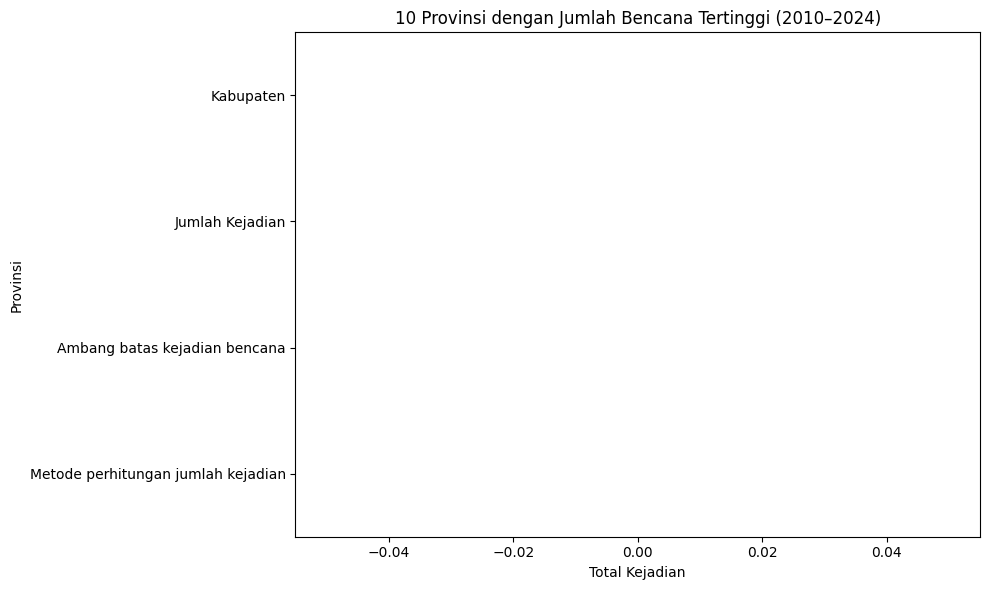

In [ ]:
# Total bencana per provinsi selama 2010–2024
total_per_provinsi = df_cleaned.set_index('Provinsi').sum(axis=1).sort_values(ascending=False)

# Visualisasi 10 provinsi paling rawan bencana
plt.figure(figsize=(10,6))
sns.barplot(x=total_per_provinsi[:10], y=total_per_provinsi.index[:10], palette='Reds_r')
plt.title("10 Provinsi dengan Jumlah Bencana Tertinggi (2010–2024)")
plt.xlabel("Total Kejadian")
plt.ylabel("Provinsi")
plt.tight_layout()
plt.show()


In [ ]:
print(df.columns)

df.head()


Index(['Provinsi', ':', 'Nama Kabupaten yang Mengalami Bencana'], dtype='object')


,Provinsi,:,Nama Kabupaten yang Mengalami Bencana
0,Kabupaten,:,Nama Provinsi yang Mengalami Bencana
1,Jumlah Kejadian,:,Jumlah Total Kejadian Bencana Menurut Kabupate...
2,Ambang batas kejadian bencana,:,1 orang atau meninggal dunia
3,NaN,NaN,50 orang yang terkena dampak/luka/mengungsi
4,NaN,NaN,5 unit rumah dan/atau bangunan fasilitas publi...


In [ ]:
df_cleaned = df.copy()

for col in df_cleaned.columns:
    if col != 'Provinsi':
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

df_cleaned = df_cleaned.dropna(how='all')

df_cleaned.head()


,Provinsi,:,Nama Kabupaten yang Mengalami Bencana
0,Kabupaten,NaN,NaN
1,Jumlah Kejadian,NaN,NaN
2,Ambang batas kejadian bencana,NaN,NaN
8,Metode perhitungan jumlah kejadian,NaN,NaN


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/tmp/ipython-input-41-2421630425.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


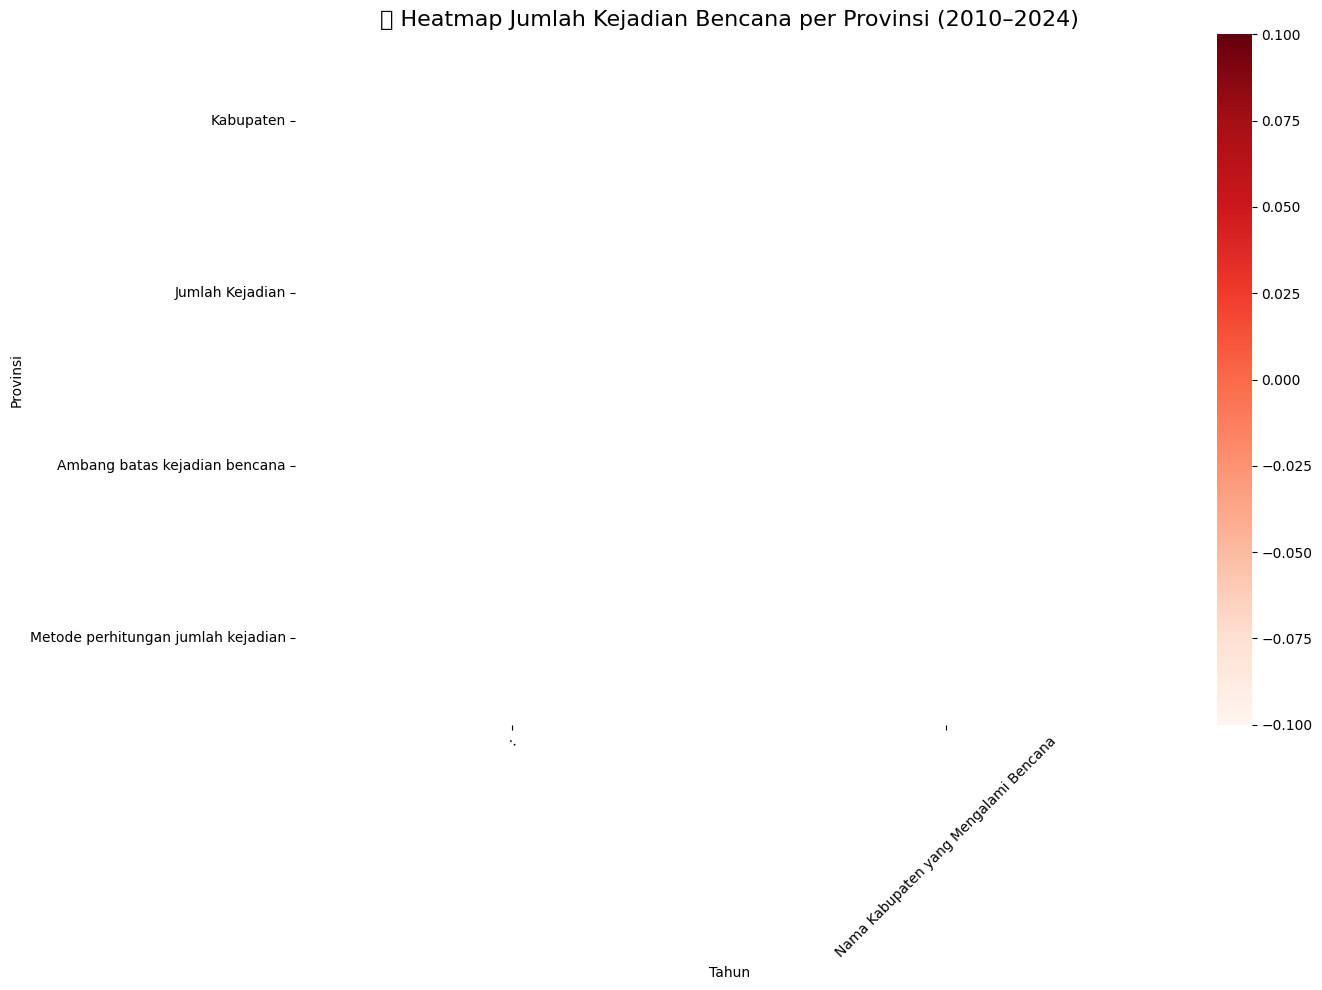

In [ ]:
# Membuat heatmap
df_heatmap = df_cleaned.set_index('Provinsi')

plt.figure(figsize=(14, 10))
sns.heatmap(df_heatmap, cmap='Reds', annot=True, fmt='.0f', linewidths=.5)

plt.title("📊 Heatmap Jumlah Kejadian Bencana per Provinsi (2010–2024)", fontsize=16)
plt.xlabel("Tahun")
plt.ylabel("Provinsi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
